In [18]:
## CAPM ## 

## pip install yfinance
## pip install pandas_datareader



In [19]:
## packages and imports
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as scs
import scipy.optimize as sco
import statsmodels.api as sm
import scipy.interpolate as sci
from pandas_datareader import data as pdr
import yfinance as yf


In [20]:
# Time period and stocks: 
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2020,1,1)
sym = ["RICK","PM","AVAV", "RACE","LVS","CGC","TIF","TSLA"]

# get data as dataframe:
yf.pdr_override() 
data = pdr.get_data_yahoo(sym, start=start_date, end=end_date)["Adj Close"]
data.iloc[np.r_[0:2, -2:0]]

[*********************100%***********************]  8 of 8 completed


,AVAV,CGC,LVS,PM,RACE,RICK,TIF,TSLA
Date,,,,,,,,
2009-12-31,29.080000,NaN,9.963785,29.802292,NaN,8.298623,35.126648,NaN
2010-01-04,29.610001,NaN,11.084208,30.519670,NaN,8.870609,35.935379,NaN
2019-12-30,62.779999,18.790001,67.944542,84.190605,164.142273,20.273634,132.783920,414.700012
2019-12-31,61.740002,21.090000,67.689629,83.591347,164.380569,20.453224,132.953033,418.329987


In [21]:
# Calculate log daily returns

log_daily_return = np.log(data / data.shift(1))
log_daily_return.iloc[np.r_[0:2, -2:0]]

,AVAV,CGC,LVS,PM,RACE,RICK,TIF,TSLA
Date,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.018062,NaN,0.106564,0.023786,NaN,0.066654,0.022762,NaN
2019-12-30,0.011696,-0.022106,-0.006329,-0.007093,-0.020479,0.014374,-0.002245,-0.037113
2019-12-31,-0.016704,0.115474,-0.003759,-0.007143,0.001451,0.008819,0.001273,0.008715


Text(0, 0.5, 'Cumulative return, in %')

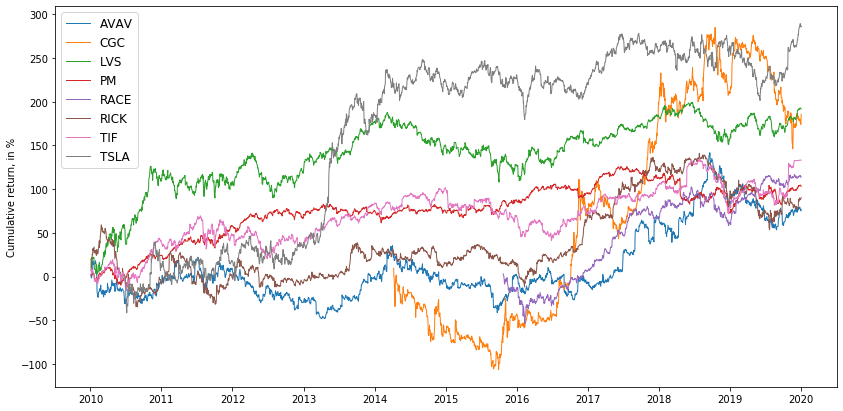

In [22]:
# log returns to avoid compound effect

################################################################

# stock performance
# evt kombinér stock performance + daily returns 

Performance = log_daily_return.cumsum() * 100
Performance.iloc[np.r_[0:2, -2:0]]


plt.figure(figsize=(14, 7))
for x in log_daily_return.columns.values:
    plt.plot(log_daily_return.index, Performance[x], lw=1, alpha=1, label=x)
plt.legend(fontsize=12)
plt.ylabel('Cumulative return, in %')

Text(0, 0.5, 'Daily returns')

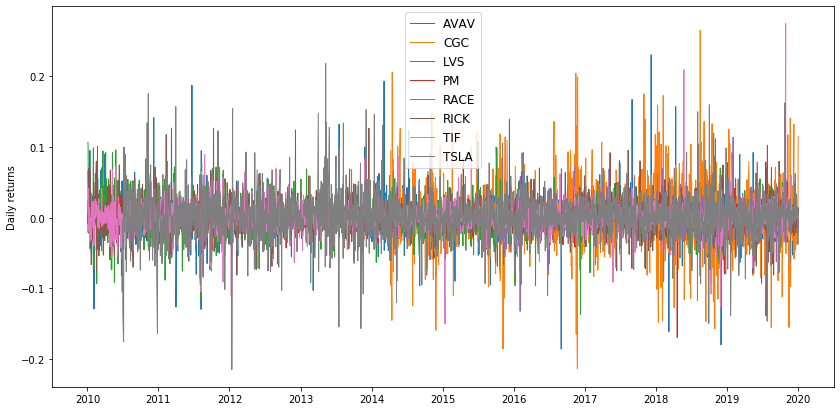

In [23]:
# plot log_daily_returns

plt.figure(figsize=(14, 7))
for c in log_daily_return.columns.values:
    plt.plot(log_daily_return.index, log_daily_return[c],lw=1, alpha=1, label=c)
plt.legend(fontsize=12)
plt.ylabel('Daily returns')

In [24]:
yearly_trading_days = 253

# Mean returns, YoY

Avg_return = log_daily_return.mean() * yearly_trading_days

# Covariance Matrix with mean return

CovMatrix = log_daily_return.cov() * yearly_trading_days
CovMatrix['Mean'] = Avg_return
CovMatrix['Mean'] = pd.Series(["{0:.2f}%".format(val*100) for val in CovMatrix['Mean']],index = CovMatrix.index)
CovMatrix

,AVAV,CGC,LVS,PM,RACE,RICK,TIF,TSLA,Mean
AVAV,0.161158,0.017369,0.031635,0.013433,0.023851,0.024195,0.033553,0.035864,7.57%
CGC,0.017369,0.504169,0.024120,0.006947,0.022110,0.004618,0.016232,0.023991,32.50%
LVS,0.031635,0.024120,0.126548,0.018483,0.030962,0.031991,0.048068,0.044943,19.27%
PM,0.013433,0.006947,0.018483,0.037754,0.008870,0.010668,0.015127,0.011950,10.37%
RACE,0.023851,0.022110,0.030962,0.008870,0.087745,0.017973,0.024020,0.037597,27.23%
RICK,0.024195,0.004618,0.031991,0.010668,0.017973,0.114131,0.023689,0.028537,9.07%
TIF,0.033553,0.016232,0.048068,0.015127,0.024020,0.023689,0.094391,0.038307,13.38%
TSLA,0.035864,0.023991,0.044943,0.011950,0.037597,0.028537,0.038307,0.263141,30.27%


In [25]:
# Minimum variance portfolio - only for check, not an algo

# 1) Invert the Cov Matrix

CovMatrix_old = pd.DataFrame(CovMatrix, columns=sym)
Inverted = pd.DataFrame(np.linalg.inv(CovMatrix_old))
Inverted

Min_weights = pd.DataFrame([1,1,1,1,1,1,1,1])

x = Inverted.dot(Min_weights)
x['Min. var. port weights'] = x / x.sum() * 100
x 

,0,Min. var. port weights
0,4.498469,11.497973
1,21.348500,54.566226
2,1.866073,4.769635
3,6.370314,16.282361
4,-0.090627,-0.231640
5,1.172091,2.995835
6,3.361567,8.592080
7,0.597632,1.527531
